In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob

# Experiment description
Run an experiment to fit a Logisitic Regression model on synthetic data generated with some nothing of disparity w.r.t the fairness metric used. Compare, using various metrics, the trained Seldonian Model (using CMA-ES and Powell BBO optimization) to the vanilla LogisticRegression model from scikit-learn. 

# Setup

- The run was made for 14 different values of $N$, the sample data size with each sample having 7 features. 
- Each sample was run for 30 trials and the following metrics was calculated: 

# Powell parallel run 

In [4]:
folder = 'result_powell_30trials_hardbarrier_v2'

config = pickle.load(open(folder + "/config.p", "rb"))
exps = pickle.load(open(folder + "/exps.p", "rb"))
res = pickle.load(open(list(glob.glob(folder + '/final_res*.p'))[0], 'rb'))
print(config)

{'name': 'powell_30trials_hardbarrier_v2', 'N': [200, 600, 1000, 4000, 25000, 78000, 100000, 200000, 320000, 470000, 600000, 740000, 890000, 1000000], 'trials': 30, 'methods': ['ttest', 'hoeffdings'], 'D': 5, 'tprs': [0.3, 0.8], 'test_size': 0.4, 'opt': 'Powell', 'hard_barrier': True}


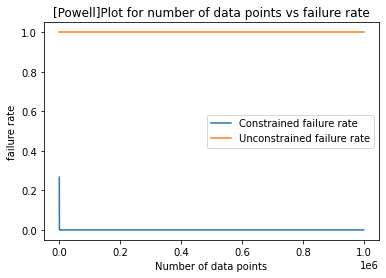

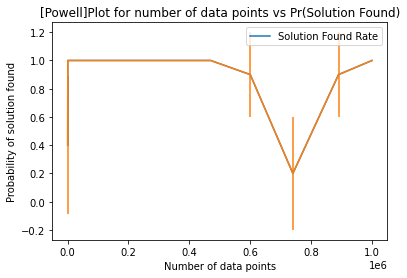

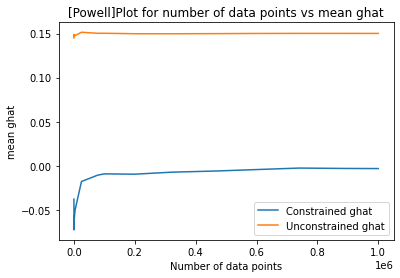

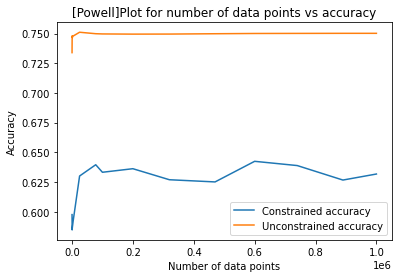

In [5]:
x =[]
sol_found_c = []
sol_found_c_std = []


ghat_c = []
ghat_uc = []

fr_c = []
fr_c_std = []

fr_uc = []
fr_uc_std = []

opt = 'Powell'

acc_c = []
acc_uc = []
for r in res:
    x.append(r['N'])
    fr_c.append(r['failure_rate'])
    fr_uc.append(r['uc_failure_rate'])

    fr_c_std.append(r['failure_rate_std'])
    fr_uc_std.append(r['uc_failure_rate_std'])
    
    sol_found_c.append(r['sol_found_rate'])
    sol_found_c_std.append(r['sol_found_rate_std'])

    acc_c.append(r['accuracy'])
    acc_uc.append(r['uc_accuracy'])

    ghat_c.append(r['ghat'])
    ghat_uc.append(r['uc_ghat'])

plt.plot(x, fr_c, label='Constrained failure rate')
plt.plot(x, fr_uc, label='Unconstrained failure rate')
plt.xlabel('Number of data points')
plt.ylabel('failure rate')
plt.legend()
plt.title(f"[{opt}]Plot for number of data points vs failure rate")
plt.show()

plt.plot(x, sol_found_c, label='Solution Found Rate')
plt.errorbar(x, sol_found_c, yerr=sol_found_c_std)
plt.xlabel('Number of data points')
plt.ylabel('Probability of solution found')
plt.legend()
plt.title(f"[{opt}]Plot for number of data points vs Pr(Solution Found)")
plt.show()

plt.plot(x, ghat_c, label='Constrained ghat')
plt.plot(x, ghat_uc, label='Unconstrained ghat')
plt.xlabel('Number of data points')
plt.ylabel('mean ghat')
plt.legend()
plt.title(f"[{opt}]Plot for number of data points vs mean ghat")
plt.show()

plt.plot(x, acc_c, label='Constrained accuracy')
plt.plot(x, acc_uc, label='Unconstrained accuracy')
plt.xlabel('Number of data points')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f"[{opt}]Plot for number of data points vs accuracy")
plt.show()

# Hard barrier powell

In [14]:
from plot_results import *

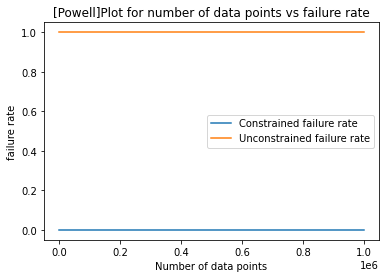

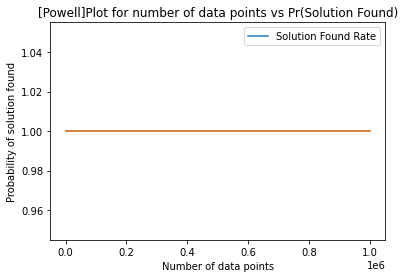

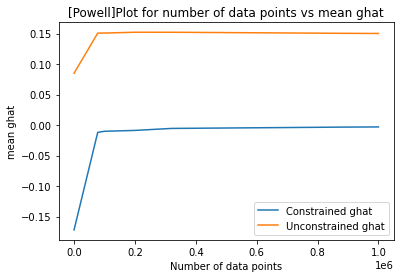

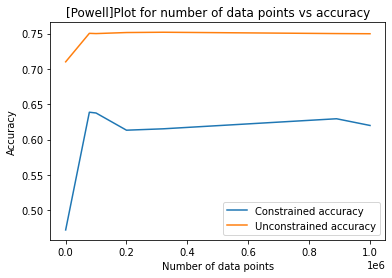

In [17]:
folder = 'result_powell_hard_barrier'

config = pickle.load(open(folder + "/config.p", "rb"))
exps = pickle.load(open(folder + "/exps.p", "rb"))
res = pickle.load(open(list(glob.glob(folder + '/final_res*.p'))[0], 'rb'))
plot_results(res, config['opt'])

# Powell soft barrier

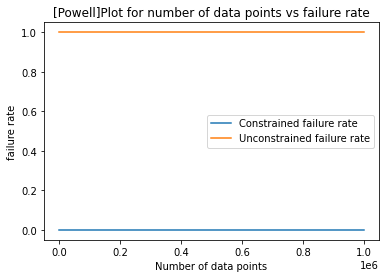

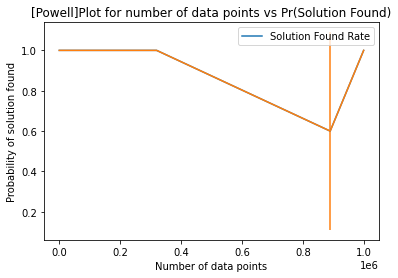

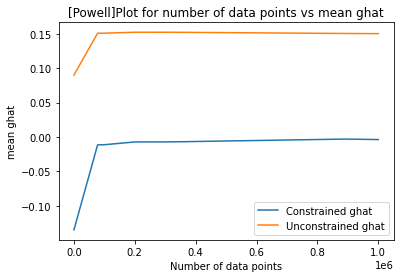

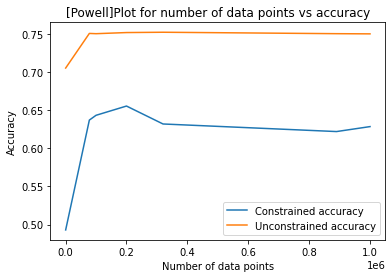

In [18]:
folder = 'result_powell_soft_barrier'

config = pickle.load(open(folder + "/config.p", "rb"))
exps = pickle.load(open(folder + "/exps.p", "rb"))
res = pickle.load(open(list(glob.glob(folder + '/final_res*.p'))[0], 'rb'))
plot_results(res, config['opt'])

# CMAES results

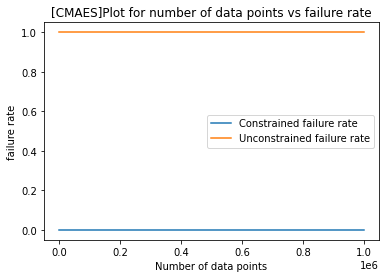

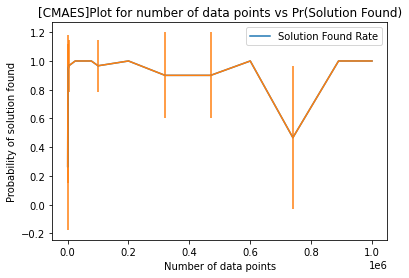

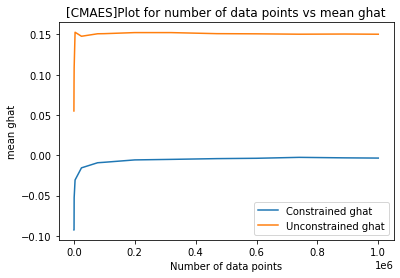

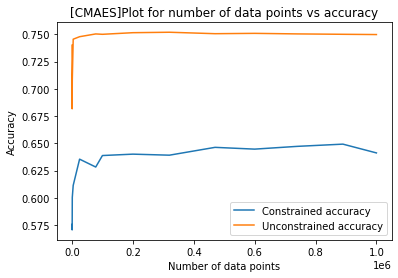

In [20]:
folder = 'result_cmaes_30trials'

config = pickle.load(open(folder + "/config.p", "rb"))
exps = pickle.load(open(folder + "/exps.p", "rb"))
res = pickle.load(open(list(glob.glob(folder + '/final_res*.p'))[0], 'rb'))
plot_results(res, config['opt'])